In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [136]:
data=pd.read_csv('digit-recognizer/train.csv')

In [137]:
X=data.drop('label',axis=1)

In [ ]:
Y=data['label']

In [139]:
print(X.shape)
print(Y.shape)

(42000, 784)
(42000,)


In [ ]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.2,random_state=1)  #splitting X,Y into train,test

train_x,cv_x,train_y,cv_y=train_test_split(train_x,train_y,test_size=0.1,random_state=1) #split train into train and cross-validation

In [141]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

best_k=0
bestscore=0;
for i in range(1,11): 
    knn=KNeighborsClassifier(i)
    knn.fit(train_x,train_y)
    prediction=knn.predict(cv_x)
    score=accuracy_score(cv_y,prediction)
    if score>=bestscore:
        best_k=i
        bestscore=score

print('best_k= '+str(best_k)+' Best Accuracy = '+str(bestscore*100))
      

best_k= 1 Best Accuracy = 96.63690476190476


In [142]:
knn=KNeighborsClassifier(best_k)
knn.fit(train_x,train_y)
prediction=knn.predict(test_x)
print('Accuracy Score on test data = '+str(accuracy_score(prediction,test_y)))
print('Accuracy Percentage = '+str(100*accuracy_score(prediction,test_y)))

Accuracy Score on test data = 0.9660714285714286
Accuracy Percentage = 96.60714285714286


7


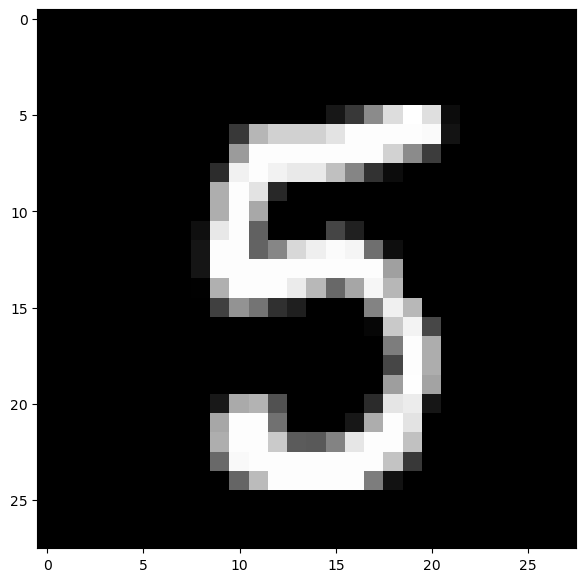

In [144]:
#To print image from image array

# Here each image is actually 28 X 28. But data is available in 1-D format so we need to convert it into 2-D first.
# idx=10
# image_data=test_data.iloc[idx].values.reshape(28,28)
# plt.figure(figsize=(7,7))
# plt.imshow(image_data,interpolation='none',cmap='gray')
# print(prediction[idx])